In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'fourier of image')

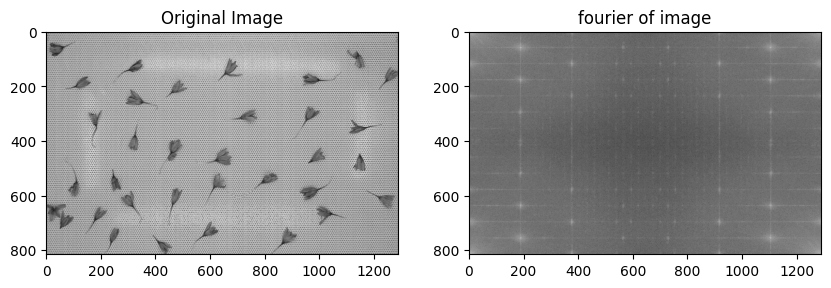

In [8]:
img = cv2.imread("saffrun.jpg", cv2.IMREAD_GRAYSCALE)

Ftransform = np.fft.fft2(img)
Ftransimg = 20*np.log(np.abs(Ftransform))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(Ftransimg, cmap='gray')
plt.title('fourier of image')

Text(0.5, 1.0, 'fourier of image')

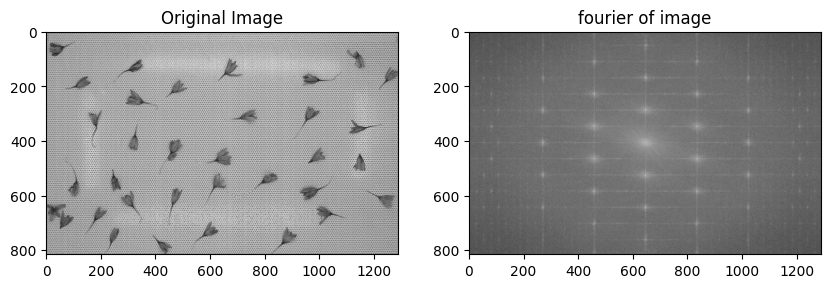

In [9]:
shiftedFtrans = np.fft.fftshift(Ftransform)
shiftedFtransimg = 20*np.log(np.abs(shiftedFtrans))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')


plt.subplot(1, 2, 2)
plt.imshow(shiftedFtransimg, cmap='gray')
plt.title('fourier of image')

In [66]:

def gaussian_filter(image, sigma):

    kernelx , kernely = image.shape
    x = np.linspace(-kernelx//2 , kernelx//2 , kernelx , dtype=float)
    y = np.linspace(-kernely//2 , kernely//2 , kernely , dtype=float)
    x , y = np.meshgrid(x, y)
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))

    return kernel

Text(0.5, 1.0, 'final image')

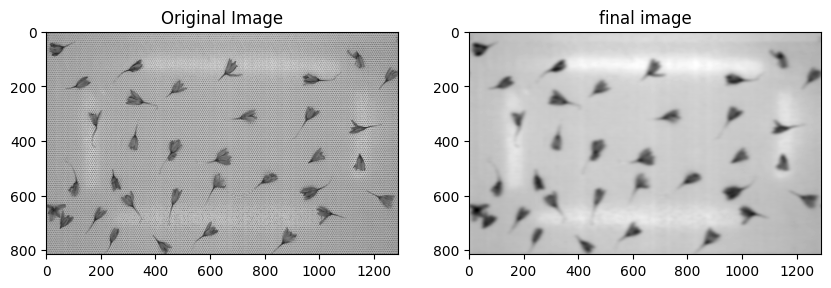

In [70]:
filter = gaussian_filter(img , 30)
filteredFtransform = shiftedFtrans * filter.T
filteredFtrasshifted = np.fft.ifftshift(filteredFtransform)
finalimage = np.fft.ifft2(filteredFtrasshifted)
finalimage = np.abs(finalimage)
finalimage = finalimage / np.max(finalimage)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')


plt.subplot(1, 2, 2)
plt.imshow(finalimage, cmap='gray')
plt.title('final image')

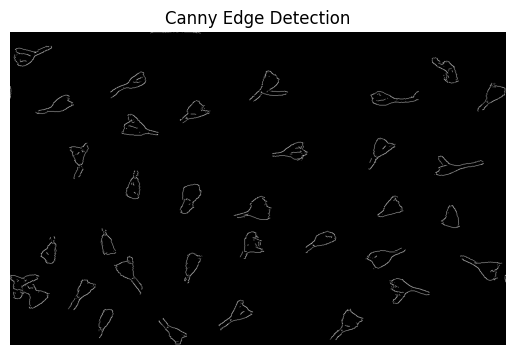

In [72]:
edges = cv2.Canny(np.uint8(finalimage * 255), 100, 400, apertureSize=5)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

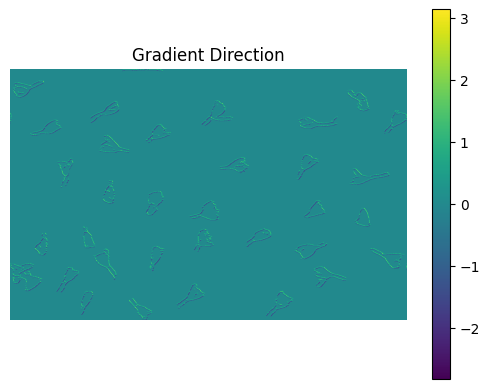

In [73]:
gradx = cv2.Sobel(edges, cv2.CV_64F, 1, 0, ksize=3)
grady = cv2.Sobel(edges, cv2.CV_64F, 0, 1, ksize=3)

graddirect = np.arctan2(grady, gradx)

plt.imshow(graddirect)
plt.title('Gradient Direction')
plt.colorbar()
plt.axis('off')
plt.show()